In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.to_csv('farmer.csv',index=False)

In [4]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [5]:
df['label'].nunique()

22

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
group = df.groupby('label')

In [8]:
group[['temperature']].mean()

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [9]:
group[['N']].mean()

,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [10]:
nitrogen = group['N'].agg(minimum='min',maximum='max',avg='mean')
nitrogen

,minimum,maximum,avg
label,,,
apple,0,40,20.80
banana,80,120,100.23
blackgram,20,60,40.02
chickpea,20,60,40.09
coconut,0,40,21.98
coffee,80,120,101.20
cotton,100,140,117.77
grapes,0,40,23.18
jute,60,100,78.40


In [11]:
nitrogen.reset_index(inplace=True)

C:\Users\Krati\AppData\Local\Temp\ipykernel_8668\3384312811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


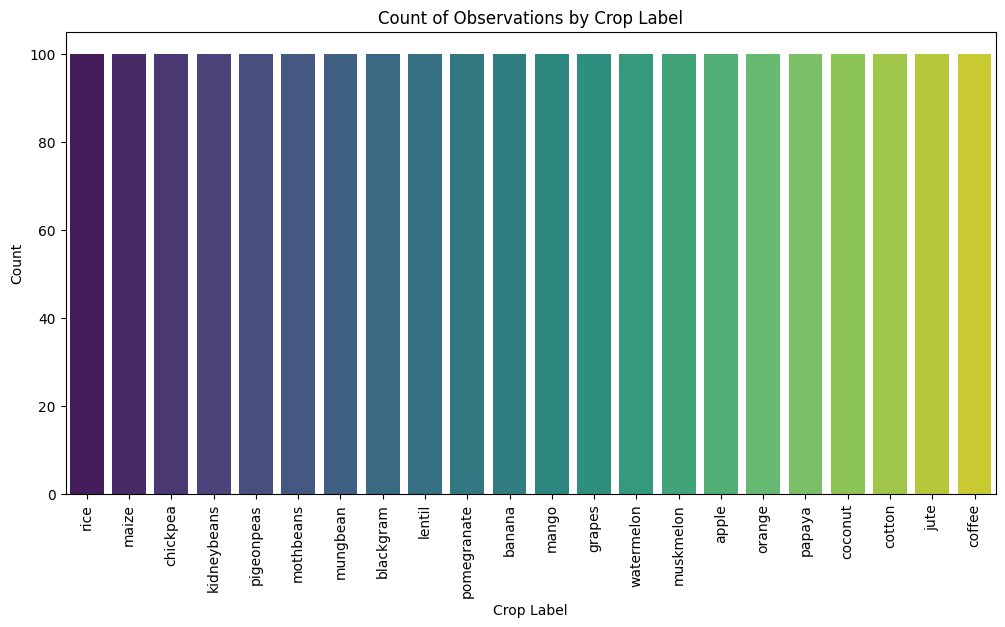

In [12]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', palette='viridis')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Count of Observations by Crop Label')
plt.xticks(rotation=90)
plt.show()

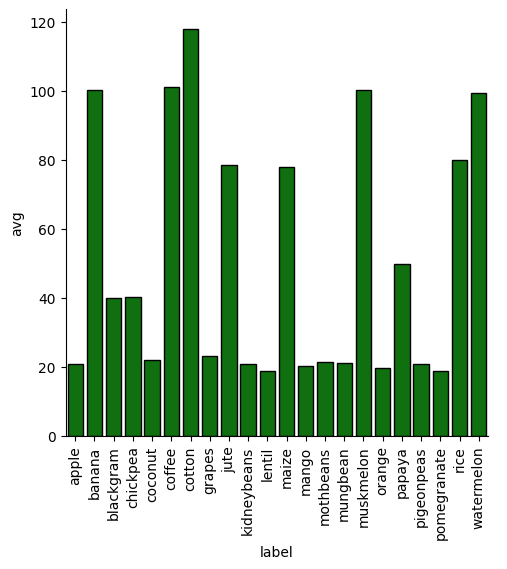

In [13]:
sns.catplot(x='label',y='avg',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

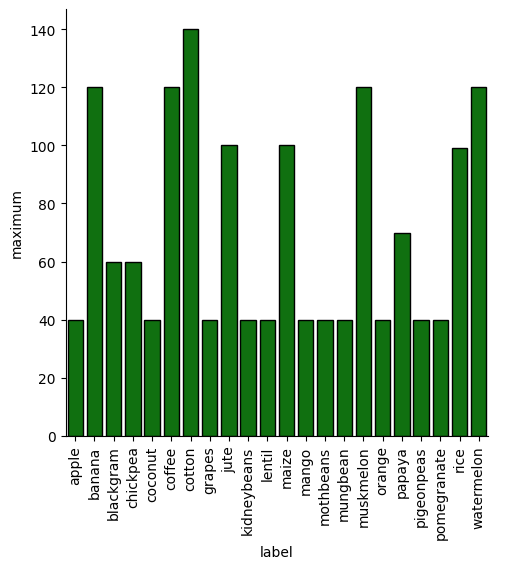

In [14]:
sns.catplot(x='label',y='maximum',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

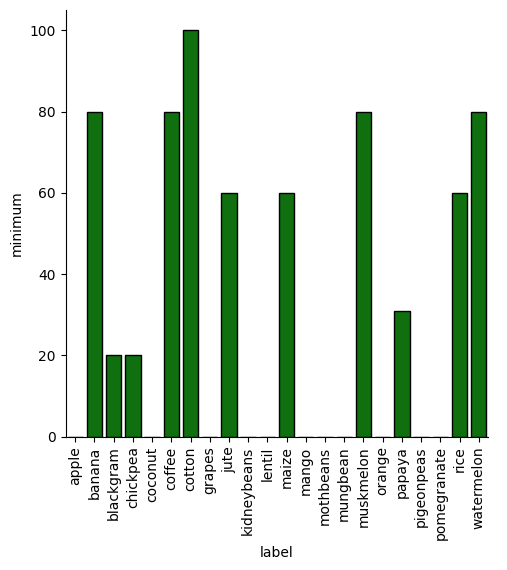

In [15]:
sns.catplot(x='label',y='minimum',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

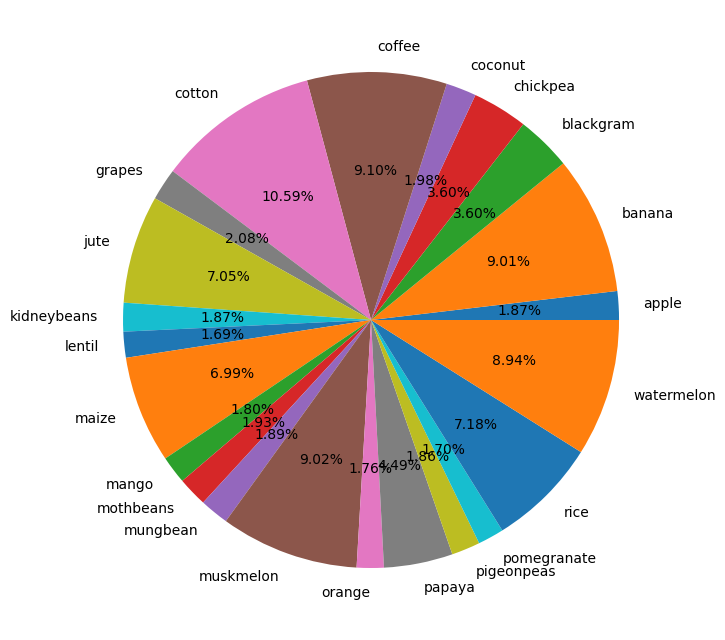

In [16]:
crops_label = list(nitrogen['label'])
avg = list(nitrogen['avg'])
plt.figure(figsize=(8,24))
plt.pie(avg,labels=crops_label,autopct='%2.2f%%')
plt.show()

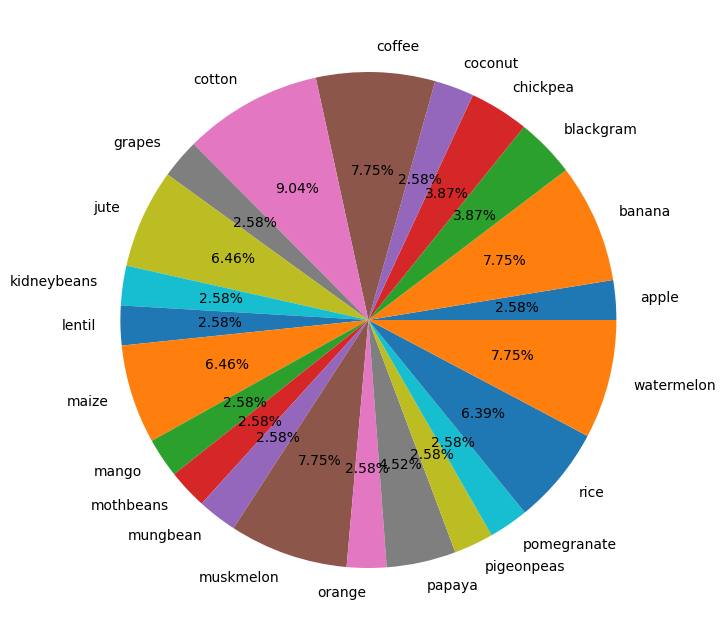

In [17]:
crops_label = list(nitrogen['label'])
avg = list(nitrogen['maximum'])
plt.figure(figsize=(8,24))
plt.pie(avg,labels=crops_label,autopct='%2.2f%%')
plt.show()

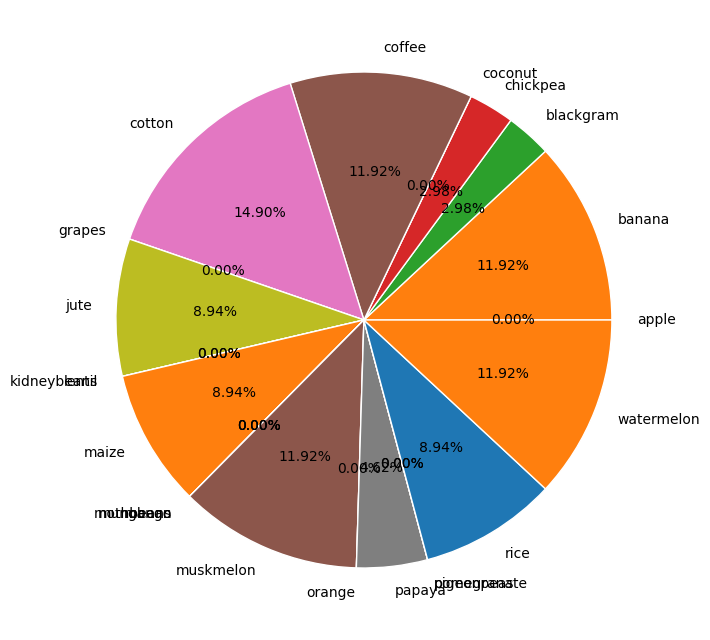

In [18]:
crops_label = list(nitrogen['label'])
avg = list(nitrogen['minimum'])
plt.figure(figsize=(8,24))
plt.pie(avg,labels=crops_label,autopct='%2.2f%%',wedgeprops={'ec':'white'})
plt.show()

In [19]:
rainfall = group['rainfall'].agg(minimum='min',maximum='max',avg='mean')
rainfall

,minimum,maximum,avg
label,,,
apple,100.117344,124.983162,112.654779
banana,90.109781,119.847970,104.626980
blackgram,60.417903,74.915595,67.884151
chickpea,65.113656,94.781896,80.058977
coconut,131.090008,225.632366,175.686646
coffee,115.156401,199.473564,158.066295
cotton,60.653817,99.931008,80.398043
grapes,65.010953,74.915062,69.611829
jute,150.235524,199.836291,174.792798


In [20]:
rainfall.reset_index(inplace=True)

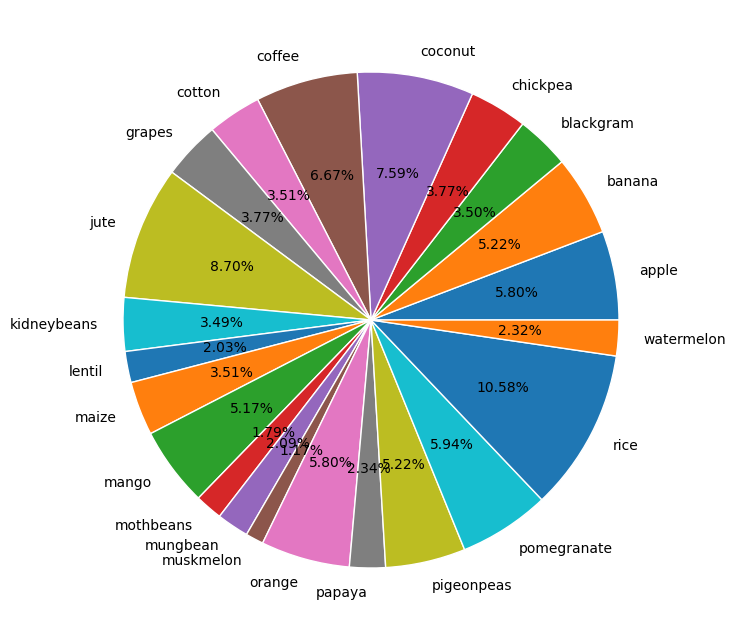

In [21]:
crops_label = list(rainfall['label'])
avg = list(rainfall['minimum'])
plt.figure(figsize=(8,24))
plt.pie(avg,labels=crops_label,autopct='%2.2f%%',wedgeprops={'ec':'white'})
plt.show()

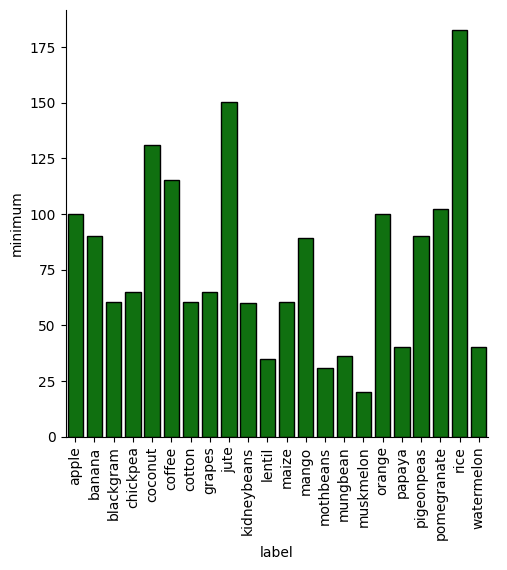

In [22]:
sns.catplot(x='label',y='minimum',data=rainfall,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

In [23]:
temp = group['temperature'].agg(minimum='min',maximum='max',avg='mean')
temp

,minimum,maximum,avg
label,,,
apple,21.036527,23.996862,22.630942
banana,25.010185,29.908885,27.376798
blackgram,25.097374,34.946616,29.973340
chickpea,17.024985,20.995022,18.872847
coconut,25.008724,29.869083,27.409892
coffee,23.059519,27.923744,25.540477
cotton,22.000851,25.992374,23.988958
grapes,8.825675,41.948657,23.849575
jute,23.094338,26.985822,24.958376


In [24]:
temp.reset_index(inplace=True)

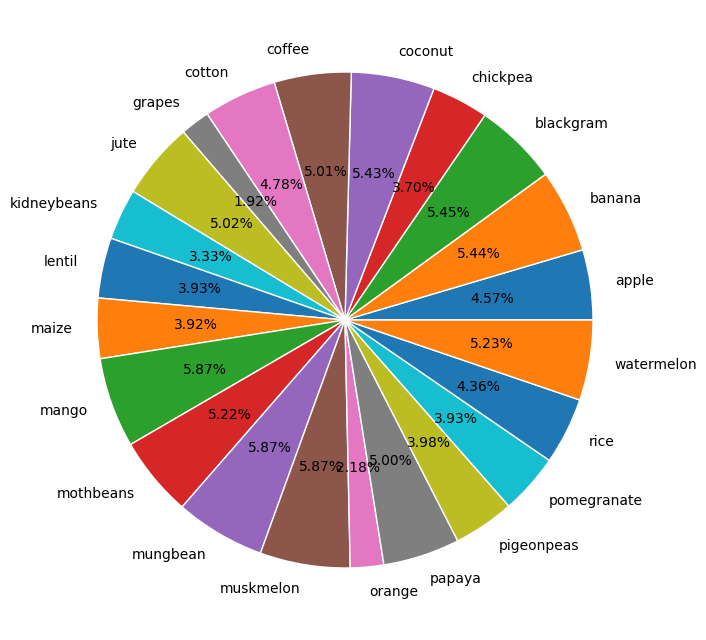

In [25]:
crops_label = list(temp['label'])
avg = list(temp['minimum'])
plt.figure(figsize=(8,24))
plt.pie(avg,labels=crops_label,autopct='%2.2f%%',wedgeprops={'ec':'white'})
plt.show()

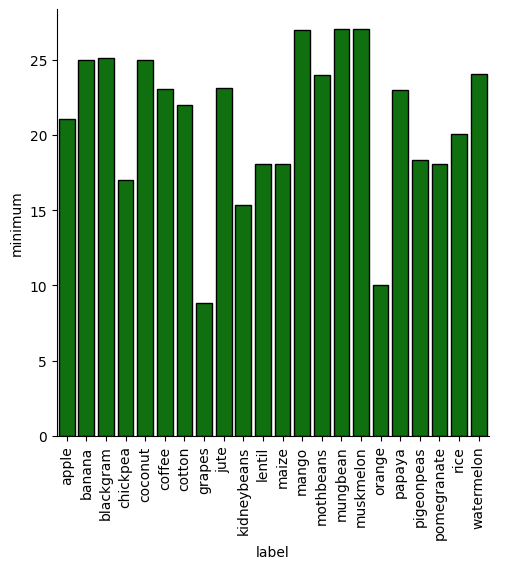

In [26]:
sns.catplot(x='label',y='minimum',data=temp,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

## Unsupervised learning
only x variable present

In [27]:
x = df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [28]:
x.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [29]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
len(df.columns)

8

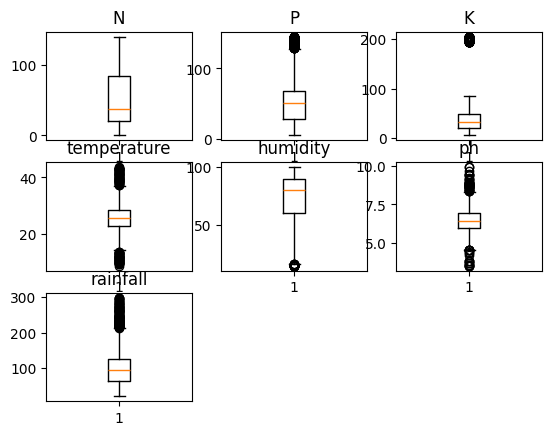

In [32]:
i = 1
for col in x.columns:
    plt.subplot(3,3,i)
    plt.title(col)
    plt.boxplot(x[col])
    i+=1
plt.show()

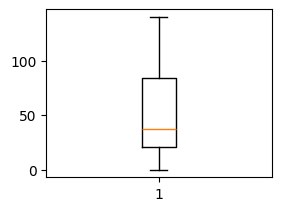

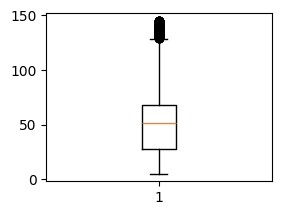

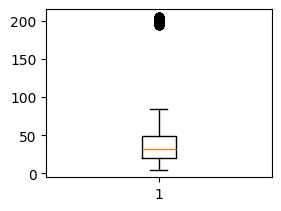

In [33]:
plt.subplot(2,2,1)
plt.boxplot(df['N'])
plt.show()

plt.subplot(2,2,2)
plt.boxplot(df['P'])
plt.show()

plt.subplot(2,2,3)
plt.boxplot(df['K'])
plt.show()


In [34]:

x.shape

(2200, 7)

In [35]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [36]:
print(df['N'].std()) # standard deviation
print(df['N'].var()) # variance
print(df['N'].mean()) # mean

36.9173338337566
1362.88953739303
50.551818181818184


In [37]:
# KMeans  accuracy normalize[outliers do not show]
from sklearn.preprocessing import MinMaxScaler , RobustScaler, StandardScaler,Normalizer
std = StandardScaler()
x_transformed = std.fit_transform(x)

In [38]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [39]:
x_transformed # normalizes data

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [40]:
x_transformed.shape

(2200, 7)

In [41]:
x.shape

(2200, 7)

In [42]:
from sklearn.cluster import KMeans
# KMeans(n) - default clusters are 8
# eucladian distance method
# 12 points---> then 12 clusters
kmeans = KMeans()
kmeans.fit(x_transformed)


KMeans()

In [43]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [44]:
df.shape

(2200, 8)

In [45]:
kmeans.labels_.shape

(2200,)

In [46]:
df['cluster_no'] = kmeans.labels_
df.head(40)

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,4
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,4
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,4
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,4
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,4
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,4
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,4
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,4
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,4


In [47]:
grup_six = df[df['cluster_no']==6]

In [48]:
grup_six['label'].unique()

array(['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'mango', 'orange', 'papaya'], dtype=object)

In [56]:
grup_six = df[df['cluster_no']==6]
grup_six['label'].unique()

array(['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'mango', 'orange', 'papaya'], dtype=object)

In [50]:
grup_six = df[df['cluster_no']==2]
grup_six['label'].unique()

array(['chickpea', 'kidneybeans', 'pigeonpeas', 'lentil'], dtype=object)

In [55]:
grup_six = df[df['cluster_no']==7]
grup_six['label'].unique()

array(['pigeonpeas', 'mothbeans', 'lentil', 'mango'], dtype=object)

In [51]:
import os,joblib
os.makedirs('models',exist_ok=True)

joblib.dump(kmeans,'./models/kmeans_model.lb')
joblib.dump(std,'./models/standardscalar.lb')
print("Your model has been saved")

Your model has been saved


In [52]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score(x_transformed,kmeans.labels_)

np.float64(0.3265725788326684)

Elbow_method --->used to find no. of cluster

In [54]:
df[['label','cluster_no']].to_csv('./models/filtering_data.csv',index=False)